In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Loading the data
df = pd.read_csv("/Users/abhishekmathur/Downloads/Risers_Data_Hackathon/Hackathon-Q./hackathon.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.shape

(45211, 17)

In [11]:
#checking for missing values in train dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#Analysis of 'Subscribed' variable
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

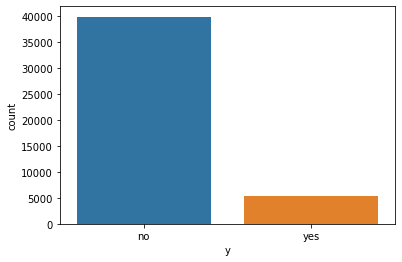

In [16]:
# Plotting the 'subscribed' frequency
sns.countplot(data=df, x="subscribed")

In [17]:
#Normalizing the frequency table of 'Subscribed' variable
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

We can say that approx 12% people have subscribed to the term insurance

In [18]:
#Frequency table
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

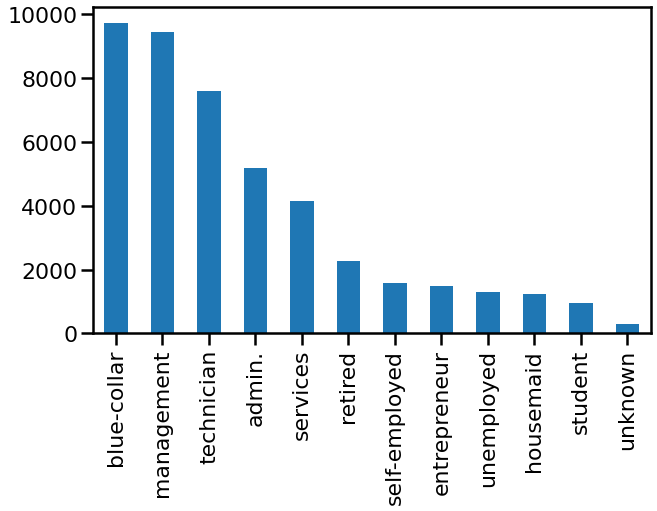

In [22]:
# Plotting the job frequency table
sns.set_context('poster')
df['job'].value_counts().plot(kind='bar', figsize=(10,6))

We can see that most of the clients are of blue-collar job and the students denotes the least as they don't make term deposits.

### Analysis of 'marital' status

In [23]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:>

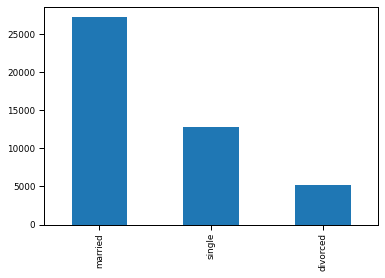

In [27]:
sns.set_context('paper')
df['marital'].value_counts().plot(kind="bar")

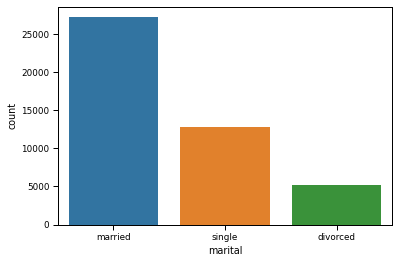

In [34]:
sns.countplot(data=df, x='marital')

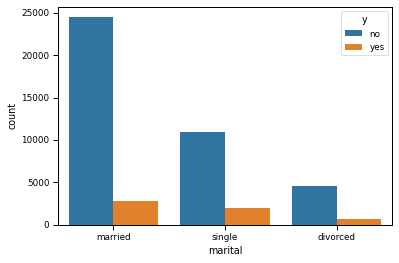

In [40]:
sns.countplot(data=df, x='marital', hue='y') #Combining sucribed with subscription_status

Analyzing the 'age' variable

<AxesSubplot:xlabel='age', ylabel='Density'>

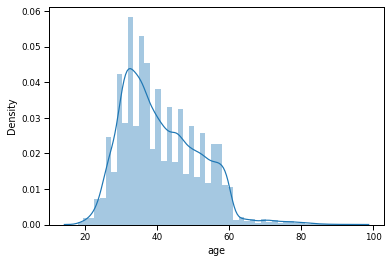

In [41]:
sns.distplot(df['age'])

We can infer that most of the clients fall in the age group of 20-60

### Bivariate Analysis

In [43]:
#job vs subscribed
job_sub = pd.crosstab(df['job'],df['y'])  # crosstab sums all no and yes.
job_sub

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [68]:
job_sub_ = job_sub.div(job_sub.sum(1), axis=0) # axis=rows, div finds the floating division, sum equal to 1
job_sub_

y,no,yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


<AxesSubplot:xlabel='job'>

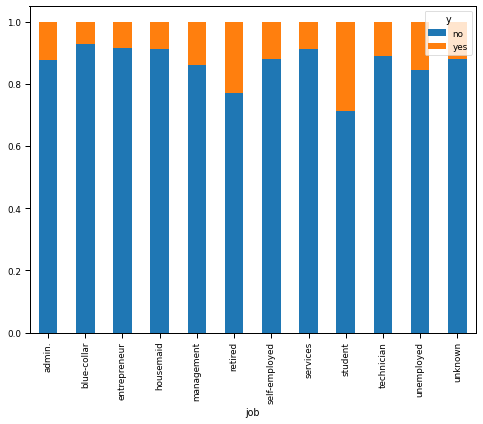

In [69]:
job_sub_.plot.bar(stacked=True,figsize=(8,6))

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [67]:
#Marital status vs subscribed
df1 = pd.crosstab(df['marital'], df['y'])
df1

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [73]:
df1_ = df1.div(df1.sum(1).astype(float), axis=0)
df1_

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


<AxesSubplot:xlabel='marital'>

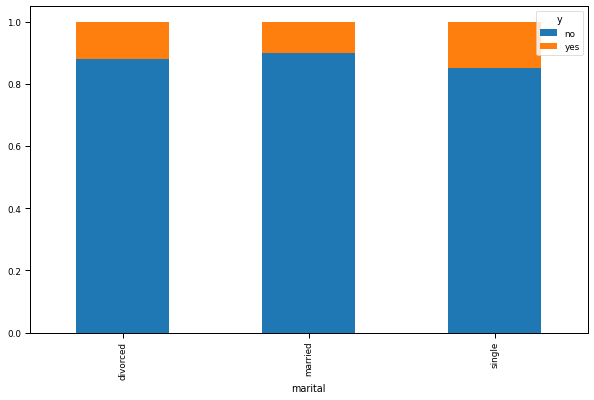

In [74]:
df1_.plot.bar(stacked=True, figsize=(10,6))

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [76]:
#default vs subscription
df2 = pd.crosstab(df['default'], df['y'])
df2

y,no,yes
default,,
no,39159,5237
yes,763,52


In [77]:
df2_ = df2.div(df2.sum(1).astype(float), axis=0)
df2_

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<AxesSubplot:xlabel='default'>

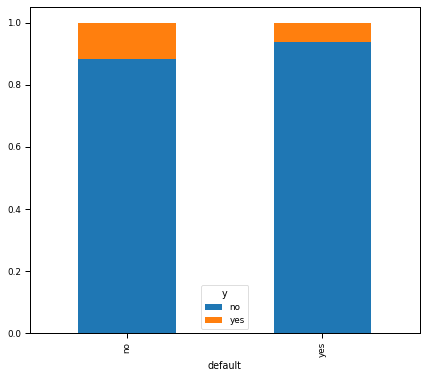

In [79]:
df2_.plot.bar(stacked=True, figsize=(7,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [80]:
# Converting the target variables into 0s and 1s
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

In [89]:
df[['y']].head(90)

,y
0,0
1,0
2,0
3,0
4,0
...,...
85,0
86,1
87,1
88,0


In [90]:
#Correlation matrix
tc = df.corr()
tc

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


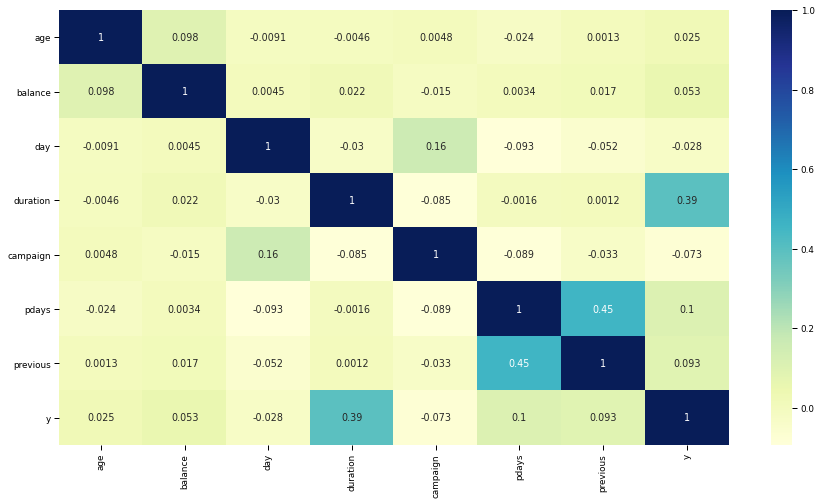

In [102]:
fig, f = plt.subplots()
sns.heatmap(tc, annot=True, cmap='YlGnBu')

fig.set_size_inches(15,8)

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

### Model Building

In [181]:
df_output = df[['y']]
df_input = df.drop('y', axis=1)

In [182]:
df_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [183]:
df_output.head()

,y
0,0
1,0
2,0
3,0
4,0


In [184]:
#generating dummy values on the train dataset
df_input = pd.get_dummies(df_input) # make separate columns for remaining character values to count their occurences
df_input.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Splitting the data into train and test set such as to test the results of our model on the test set. keeping 20% of the dataset as our testing set and the rest as our training set.

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

### Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
#creating an object of logistic regression model
model = LogisticRegression()

In [189]:
#fitting the data into the model
model.fit(X_train, y_train)

LogisticRegression()

In [190]:
model.score(X_test, y_test)

0.893177043016698

We got an accuracy score of 89.3% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Using Decision Tree algorithm to for dealing with non-linearity

### Decision Tree

In [237]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)

In [238]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [239]:
model.score(X_test, y_test)

0.9025765785690589

            We got an accuracy of more than 90%.

In [240]:
df_input.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [242]:
output_predicted = model.predict(df_input)
output_predicted

array([0, 0, 0, ..., 1, 0, 0])

            Finally, we will save these predictions into a csv file

In [243]:
df_submission = pd.DataFrame()

In [246]:
df_submission['subscribed'] = output_predicted

In [247]:
df_submission['subscribed'].replace(0,'no',inplace=True)
df_submission['subscribed'].replace(1,'yes',inplace=True)

In [248]:
df_submission.head()

,subscribed
0,no
1,no
2,no
3,no
4,no


In [249]:
df_submission.to_csv('submission_file.csv', header=True, index=False)

### SVM (Support vector machine)

In [254]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

SVC()

In [255]:
rbf_model.score(X_test,y_test) 

0.8839986730067455

### K_Fold_Cross_Validation

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
from sklearn.model_selection import cross_val_score

In [258]:
c = cross_val_score(RandomForestClassifier(n_estimators=40),df_input, df_output,cv=10)
np.average(c)

0.7270983237006603

In [259]:
a = cross_val_score(LogisticRegression(solver="liblinear",multi_class="ovr"), df_input, df_output, cv=10)
np.average(a)

0.8295755392227788

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
d = cross_val_score(DecisionTreeClassifier(), df_input, df_output, cv =10)
np.average(d)

0.6306373881931496

Acc. to K Fold Cross Validation, Logistic Regression is best model acc. to accuracy (i.e. around 83%) 